# Lecture 10: Problem Sets

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

## Convergence Order

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

### Definition 1

A sequence $\{x_k\}_k \subseteq \RR^n$ generated by a numerical method which converges to
some $x_{\ast}$ is said to __converge of order p__ ($p \geqslant 1$) if there exists
a $k_0 \in \NN$ and a constant $C > 0$ such that

$$
\dfrac{\| x_{k+1} - x_{\ast}\|}{\| x_k - x_{\ast}\|^p} \leqslant C 
\quad \forall k \geqslant k_0
$$

In the case of $p = 1$, the constant $C < 1$ (unless we don't get any error reduction).
In particular, we say the sequence is __converges linearly__ if $p=1$, and it __converges
quadratically__, if $p=2$.

### Remark

Define the error $\epsilon_k = x_k - x_{\ast}$. 
Typical error sequence look like this

* Let's take $p=1$ and $C = 0.1$. Starting from $\epsilon_0 = 1$,
  $\epsilon_1 = 10^{-1}, \epsilon_2 = 10^{-2}, \epsilon_3 = 10^{-3}, \ldots$
* In case of quadratic convergence, we get a quite different behavior.
  For $C=1$ and $\epsilon_0 = 10^{-1}$, we obtain
  $\epsilon_1 = 10^{-2}, \epsilon_2 = 10^{-4}, \epsilon_3 = 10^{-8}, \ldots $
  


## Bisection Method

Consider the so-called Legendre polynom of degree $5$ given by
$$
L_5(x) = \dfrac{x}{8}(63 x^4 - 70x^2 + 15)
$$

with the roots lying in the interval $(-1,1)$.  Take $a=0.6$, $b=1$.

__a)__ Plot $L_5$ on $[0,1]$.

<IPython.core.display.Javascript object>


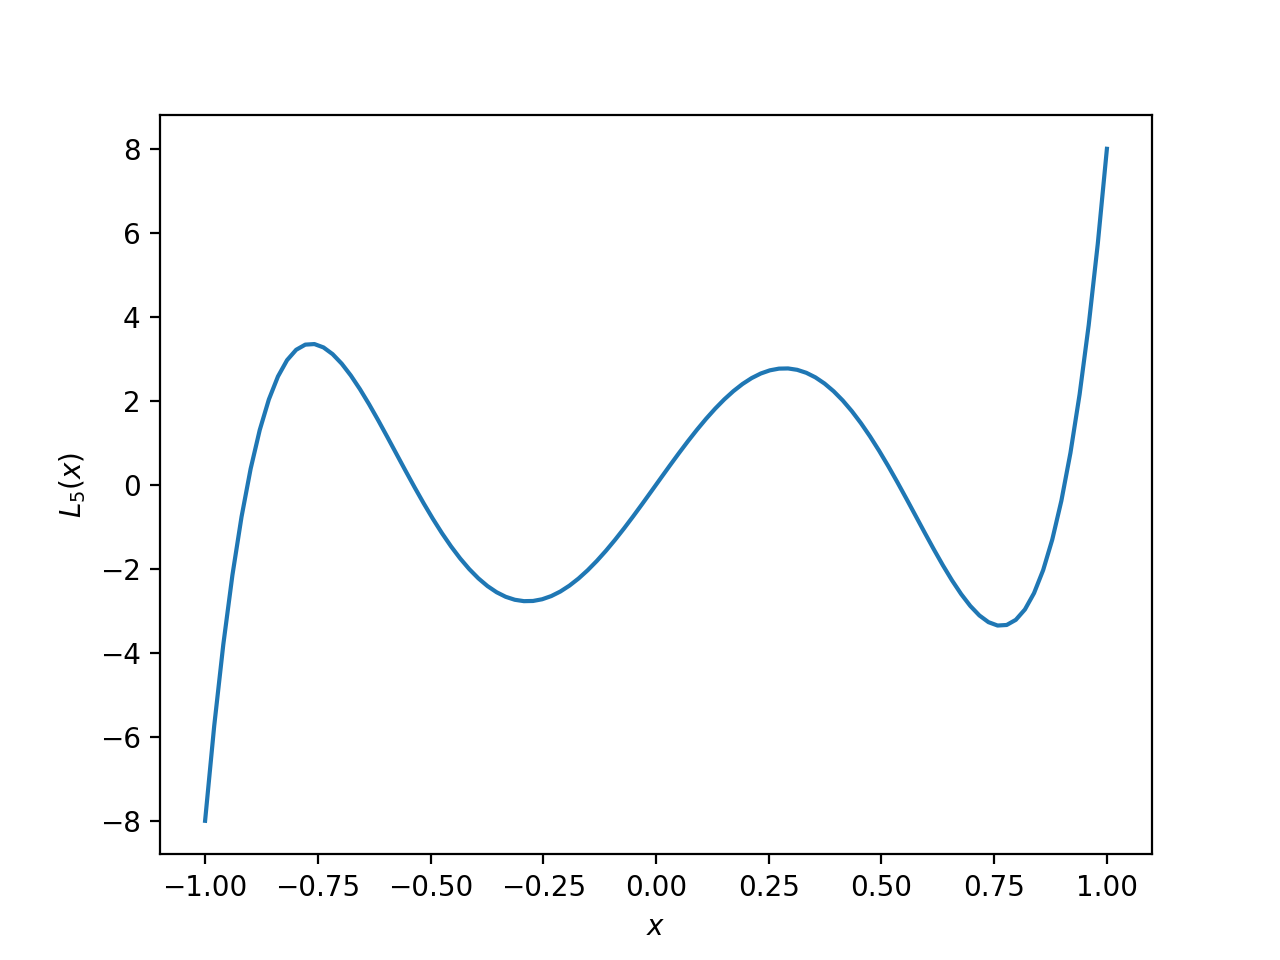

Text(0, 0.5, '$L_5(x)$')

In [179]:
# 'Magic' command to create a zoom-able & resize-able plot
#  You don't need a plt.show() to show the figure
#  But make sure to close it before you open the new interactive plot
#  in another cell. Or simply start the cell again with the magic command
%matplotlib notebook 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

f = lambda x : x*(63*x**4 - 70*x**2 + 15)
N = 100
x = np.linspace(-1, 1, N)
y = f(x)

plt.plot(x,y)
plt.xlabel("$x$")
plt.ylabel("$L_5(x)$")

__b)__  Implement the bisection method as discussed in Lecture 9.

In [180]:
def pprint(descr, a):
    print(descr + " = ")
    print(a)

def bisection(a, b, f, max_num_iter, tol):
    # Check whether f(a)*f(b) < 0.
    if f(a)*f(b) > 0:
        raise RuntimeError(
        """
        f(a) and f(b) have the same signs.
        The bisection method doesn't work this way!""")
    
    num_iter = 0
    # Set err to something larger than tol to begin with
    err = tol + 1
    xs = []
    fxs = []
    errs = []
    while num_iter <= max_num_iter and err > tol:
        num_iter += 1
        x = (a+b)/2.0 
        err = 1/2.0*(b-a)
        fx = f(x)
        if fx*f(b) < 0:
            a = x
        elif fx*f(a) < 0:
            b = x
        else:
            err = 0 # f(c) must be zero
        
        errs.append(err)
        xs.append(x)
        fxs.append(fx)

    return (xs, fxs, errs, num_iter) 

__c__) Now try to approximate the root in $[0.6,1]$.
Set $\mathrm{tol} = 10^{-10}$. How many iterations will it take to satisfy $|x_k - x_{\ast}| < \mathrm{tol}$?

Plot $x_k$ and $f(x_k)$ together with the function $f$.

xs = 
[0.8, 0.9, 0.95, 0.925, 0.9125000000000001, 0.90625, 0.903125, 0.9046875, 0.90546875, 0.905859375, 0.9060546875, 0.90615234375, 0.906201171875, 0.9061767578125, 0.90618896484375, 0.906182861328125, 0.9061798095703124, 0.9061813354492188, 0.9061805725097656, 0.906180191040039, 0.9061800003051756, 0.906179904937744, 0.9061798572540283, 0.9061798334121703, 0.9061798453330994, 0.9061798512935638, 0.9061798483133316, 0.9061798468232155, 0.9061798460781574, 0.9061798457056284, 0.9061798458918928, 0.9061798459850251]
fxs = 
[-3.196160000000006, -0.32913000000000353, 2.9819490624999943, 1.1360672949218764, 0.3586103390502947, 0.003857225179672241, -0.1653162430861599, -0.08140455742704851, -0.03894306603896017, -0.01758535027246592, -0.006874679998826579, -0.0015113830221902774, 0.0011722570193578522, -0.00016972899673214705, 0.0005012225100476438, 0.00016573638165191484, -1.998901254979669e-06, 8.186809176397009e-05, 3.9934433143776564e-05, 1.8967725416758817e-05, 8.484401944960424e-06,

<IPython.core.display.Javascript object>


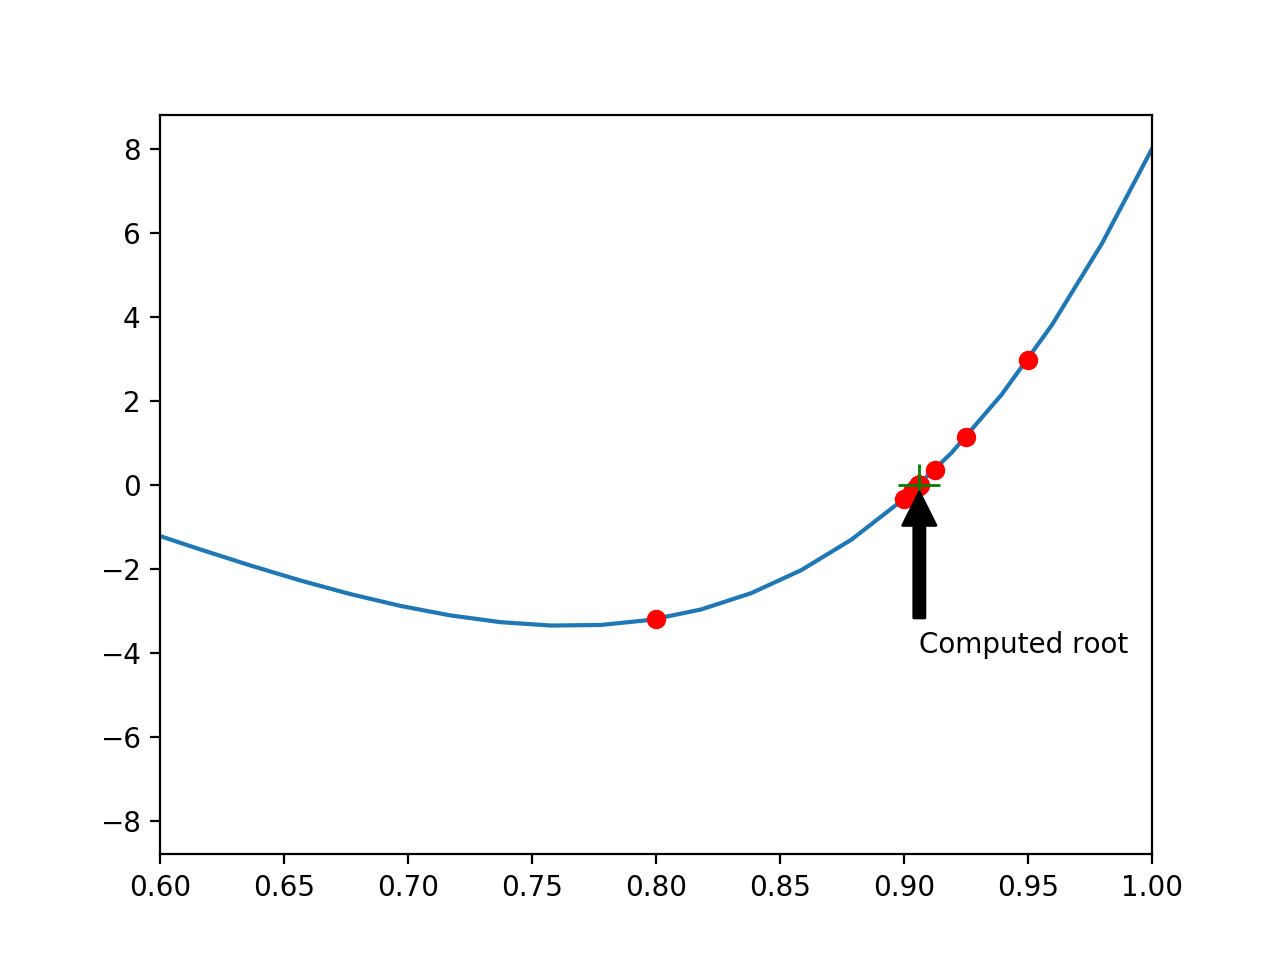

Text(0.9061798459850251, -4, 'Computed root')

In [181]:
%matplotlib notebook

a, b = 0.6, 1.0
max_num_iter = 100
tol = 1e-10

xs, fxs, errs, num_iter = bisection(a, b, f, max_num_iter, tol)
pprint("xs", xs)
pprint("fxs", fxs)
pprint("errs", errs)
pprint("num_iter", num_iter)

# Plot function
plt.plot(x, y)
# Add to the plot the computed midpoints and corresponding f values
plt.plot(xs, fxs, 'ro')
# Set xmin, xmax plotting range
plt.xlim((0.6,1))
# We replot the last point to mark is specifically
plt.plot(xs[-1], fxs[-1], color='green', marker='+', markersize=15)
# Or we can use a more fancy annotation 
plt.annotate('Computed root', xy=(xs[-1], fxs[-1]), xytext=(xs[-1], -4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


We needed 32 iteration to get under the requested tolerance.
Note that in step 32, we actually compute the midpoint $x_{31}$
of $I_{31} = (a_{31}, b_{31})$, and then we pick the new interval
$a_{32}$ and $b_{32}$.

The number of iterations is also in accordance with the predicted number of
midpoint computations. Based on the 
error estimate 
$$
| x_k - x_{\ast} | \leqslant \dfrac{1}{2^{k+1}} | b -a|.
$$
So to make sure that $|x_k - x_{\ast}| \leqslant \mathrm{tol}$
we need to make sure that $k$ satisfies

\begin{align*}
& \dfrac{1}{2^{k+1}} |b-a| \leqslant \mathrm{tol}
\\
\Leftrightarrow 
& \dfrac{\log(|b-a|/\mathrm{tol})}{\log(2)} \leqslant k+1
\end{align*}
which in our case gives
$$
\dfrac{\log(0.4\cdot 10^{10})}{\log(2)} - 1 \simeq 30.897352853986263
$$
so this estimate tells you that $| x_{31} - x_{\ast}| \leqslant 10^{-10}$,
exactly what our bisection algorithm gave us.

__d__) Next try to compute an "exact" root $x_{ex}$ by setting $\mathrm{tol}$ to $10^{-16}$.

In [182]:
tol = 10**-16
xs, fxs, errs, num_iter = bisection(a, b, f, max_num_iter, tol)
x_ex = xs[-1]
pprint("x_final", x_ex)
pprint("f(x_final)", fxs[-1])
pprint("Number of iterations", num_iter)

x_final = 
0.906179845938664
f(x_final) = 
0.0
Number of iterations = 
52


__e)__ Now for each $k$ compute $\epsilon_k = |x_k - x_{ex}|$ for the first 32 iterations,
and plot $\epsilon_k$ as function of $k$ in a semi-log plot. You can use
```plt.semilogy``` which is part of matplotlib. What can you say
about the behavior of the error sequence?

<IPython.core.display.Javascript object>


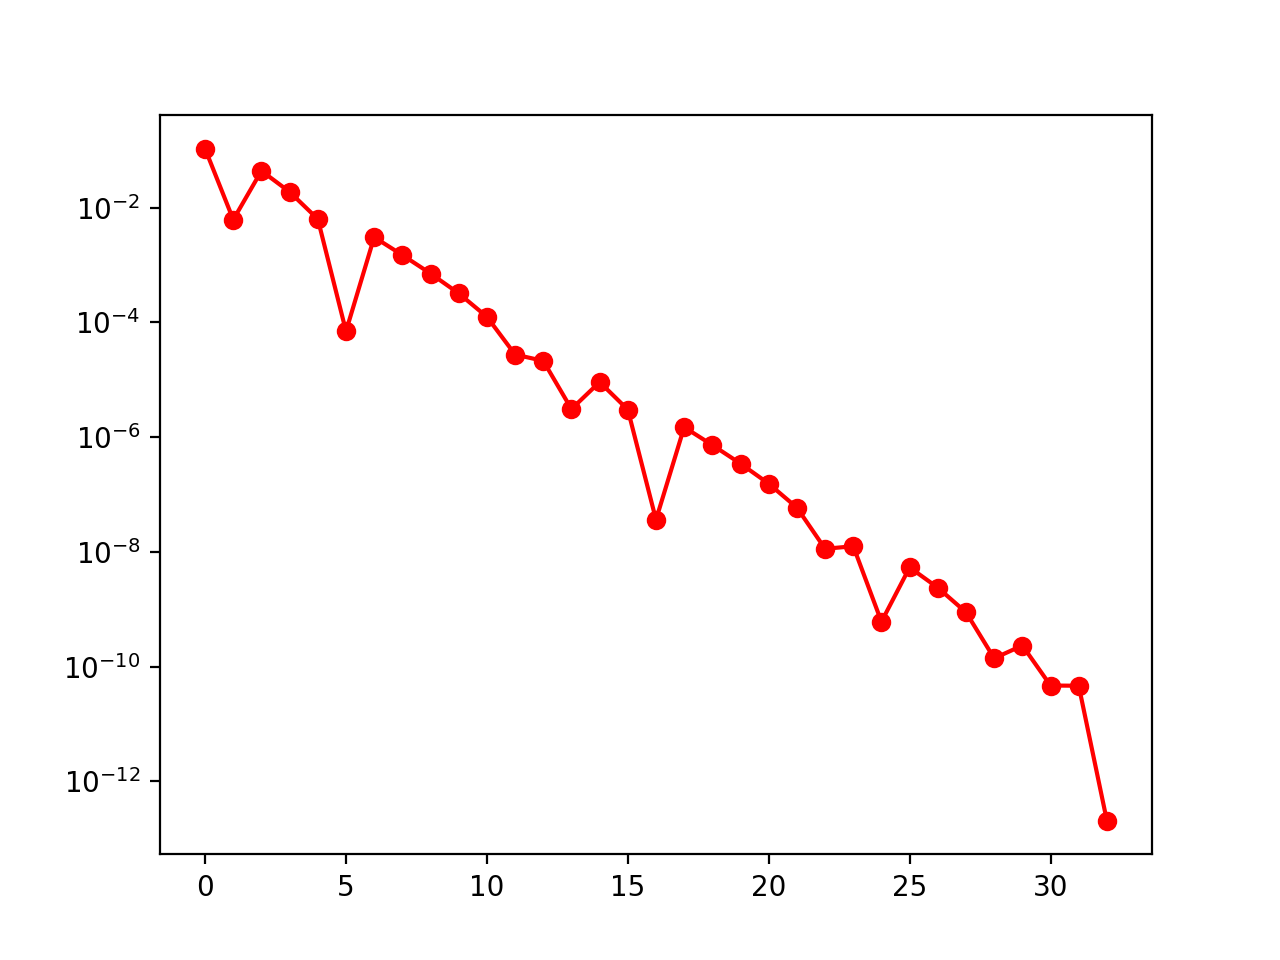

In [185]:
%matplotlib notebook

# Rerun computation
tol = 0
max_num_iter = 32
xs, fxs, errs, num_iter = bisection(a, b, f, max_num_iter, tol)

# Turn xs into an numpy array for easier transforming
xs = np.array(xs)
eps = np.abs(xs - x_ex)

plt.semilogy(eps, 'ro-')


## Contraction Mapping Theorem

We try to solve
$$
f(x) = 2x - \tan(x) = 0
$$

__a__) Plot the functions $x \mapsto 2x$ and $x\mapsto \tan(x)$ and conclude
that a root to $f$ must be somewhere in the interval $[0,2]$

<IPython.core.display.Javascript object>


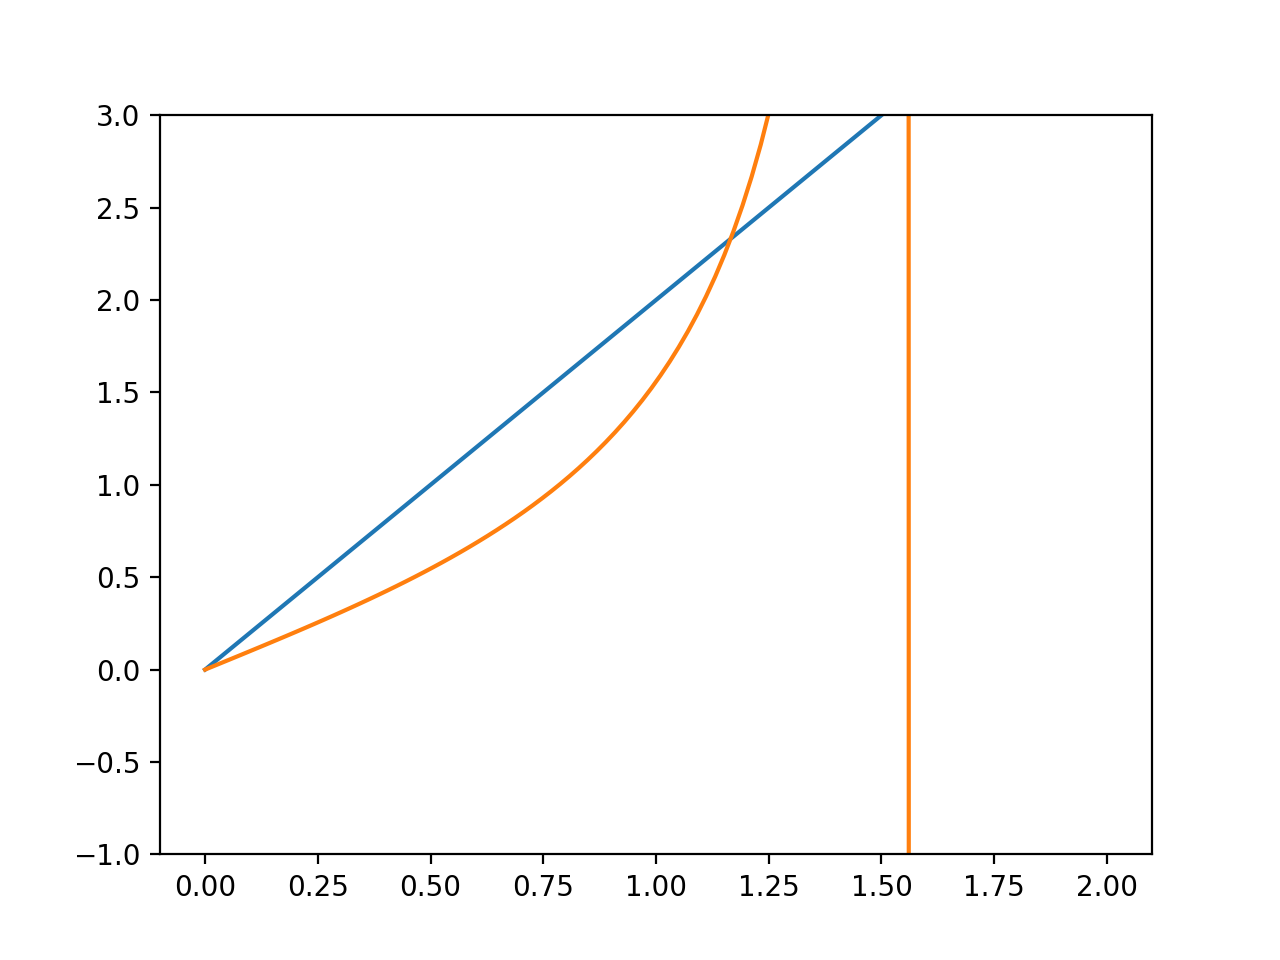

(-1, 3)

In [190]:
%matplotlib notebook

x = np.linspace(0,2,100)
f_1 = 2*x
f_2 = np.tan(x)

plt.plot(x, f_1)
plt.plot(x, f_2)
# Set ymin and ymin as tan has a pole at pi/2
plt.ylim((-1,3))

__Observations__: We have 2 roots, one obvious at $0$ and one somewhere between
$1.00$ and $1.2$.

__b__) Now consider two possible reformulations as fixpoint problem:

* Solve $x = \tfrac{1}{2} \tan(x) =: \phi_1(x)$

* Solve $x = \arctan(2x) =: \phi_2(x)$

Implement a simple Python function ```fixpoint``` which takes $\phi$, an initial guess $x_0$ and the maximum number of iterations to compute an approximation of the fixpoint.

In [232]:
def fixpoint(phi, x_0, max_num_iter):
    xs = [x_0]
    num_iter = 0
    while num_iter <= max_num_iter:
        num_iter += 1
        xs.append(phi(xs[-1]))
    return np.array(xs)  

__c)__ Now try to compute a fixpoint approximation using $\phi_1$ and $\phi_2$. 
Start with initial value $x_0 \in [0.8, 1.2]$. Tabulate the results and compare and discuss them.

In [248]:
# For nice plotting of tables
import pandas as pd

phi_1 = lambda x : 0.5*np.tan(x)
phi_2 = lambda x : np.arctan(2*x)

max_num_iter = 20

In [249]:
x_0  = 0.8
xs_1 = fixpoint(phi_1, x_0, max_num_iter)
xs_2 = fixpoint(phi_2, x_0, max_num_iter)

df_1 = pd.DataFrame({'$x_k$': xs_1})
df_2 = pd.DataFrame({'$x_k$': xs_2})
df_1

,$x_k$
0,8.000000e-01
1,5.148193e-01
2,2.828515e-01
3,1.453221e-01
4,7.317690e-02
5,3.665390e-02
6,1.833516e-02
7,9.168607e-03
8,4.584432e-03
9,2.292232e-03


In [250]:
df_2

,$x_k$
0,0.800000
1,1.012197
2,1.111980
3,1.148235
4,1.160107
5,1.163859
6,1.165031
7,1.165396
8,1.165510
9,1.165545


__Observations__: The first fixpoint formulation does not converge to the
fixpoint $x_{\ast} \in [1, 1.2]$. Instead it seems to diverge at first and then finally converge to the fixpoint at $0$. The main reason for that behavior is that $0.5\tan(x)$
is not a contraction mapping in $[1, \pi/2]$.

The fixpoint formulation with $\phi_2$ on the other works well and converges quickly to
the fixpoint $x_{\ast} \approx 1.165561$.